In [4]:
using Distributions, Gadfly;
d = Gamma(23,1);
[Base.mean(d) Base.median(d) Distributions.modes(d)]

1×3 Array{Float64,2}:
 23.0  22.6675  22.0

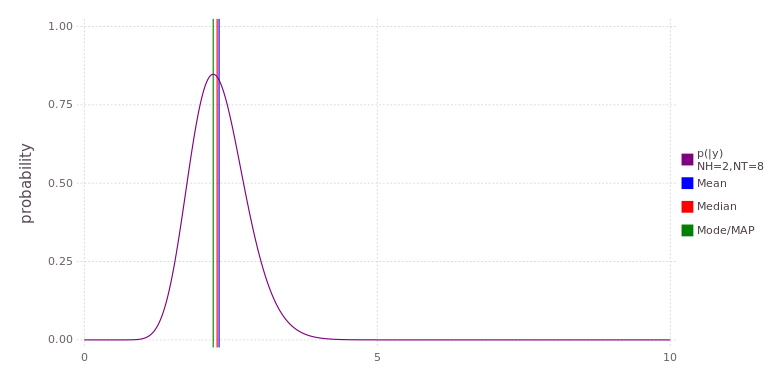

false

(10001,)

In [18]:
x = collect(0:0.001:10);
prior = ones(length(x));
print(size(prior))
# print(prior)
d = Gamma(23,0.1);
median_val = Base.median(d);
mean_val = Base.mean(d);
mode_val = Distributions.modes(d);
posterior1 = pdf.(d,x);
myplot = Gadfly.plot(
layer(x=x,y=posterior1,Geom.line,Theme(default_color=colorant"purple")),
layer(xintercept=[mean_val],Geom.vline(color=colorant"blue")),
layer(xintercept=[median_val],Geom.vline(color=colorant"red")),
layer(xintercept=[mode_val[1]],Geom.vline(color=colorant"green")),
Guide.ylabel("probability"),
Guide.xlabel(""),
Guide.manual_color_key("", ["p(|y)
NH=2,NT=8",
"Mean", "Median", "Mode/MAP"], ["purple","blue","red","green"]));
draw(PNG(8inch, 4inch), myplot)